In [202]:
from read_dataset import *
from model import *
from tools import *

## Read and Regrid data from online repository

In [2]:
# Load a SST dataset from online repository.
ds = read_cmip6_data()

Using selector: EpollSelector
Checking None for explicit credentials as part of auth process...
Checking Cloud SDK credentials as part of auth process...
Cloud SDK credentials not found on disk; not using them
Making request: GET http://169.254.169.254
Compute Engine Metadata server unavailable on attempt 1 of 3. Reason: [Errno 113] No route to host
Making request: GET http://169.254.169.254
Compute Engine Metadata server unavailable on attempt 2 of 3. Reason: [Errno 113] No route to host
Making request: GET http://169.254.169.254
Compute Engine Metadata server unavailable on attempt 3 of 3. Reason: [Errno 113] No route to host
Authentication failed using Compute Engine authentication due to unavailable metadata server.
Connection with method "google_default" failed
Traceback (most recent call last):
  File "/home/iuri/miniconda3/envs/xesmf/lib/python3.10/site-packages/gcsfs/credentials.py", line 214, in connect
    self.connect(method=meth)
  File "/home/iuri/miniconda3/envs/xesmf/lib

In [3]:
# REGRIDS DATA - 1x1 degree
dataset=Regrid(ds)

dataset assumed to be in lon/lat coordenates
Reuse existing file: bilinear_180x360_180x360_peri.nc
using dimensions ('lat', 'lon') from data variable tos as the horizontal dimensions for this dataset.


/home/iuri/miniconda3/envs/xesmf/lib/python3.10/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


In [4]:
# puts the SST data in a vector.
tos=dataset.tos.values # é igual fazer Tos=dataset['tos']
lat=dataset.lat.values
lon=dataset.lon.values
#time=dataset.time.values

GET: https://storage.googleapis.com/download/storage/v1/b/cmip6/o/CMIP6%2FCMIP%2FNOAA-GFDL%2FGFDL-ESM4%2Fhistorical%2Fr3i1p1f1%2FOmon%2Ftos%2Fgr%2Fv20180701%2Ftos%2F0.0.0?alt=media, (), {}
GET: https://storage.googleapis.com/download/storage/v1/b/cmip6/o/CMIP6%2FCMIP%2FNOAA-GFDL%2FGFDL-ESM4%2Fhistorical%2Fr3i1p1f1%2FOmon%2Ftos%2Fgr%2Fv20180701%2Ftos%2F1.0.0?alt=media, (), {}
GET: https://storage.googleapis.com/download/storage/v1/b/cmip6/o/CMIP6%2FCMIP%2FNOAA-GFDL%2FGFDL-ESM4%2Fhistorical%2Fr3i1p1f1%2FOmon%2Ftos%2Fgr%2Fv20180701%2Ftos%2F2.0.0?alt=media, (), {}
GET: https://storage.googleapis.com/download/storage/v1/b/cmip6/o/CMIP6%2FCMIP%2FNOAA-GFDL%2FGFDL-ESM4%2Fhistorical%2Fr3i1p1f1%2FOmon%2Ftos%2Fgr%2Fv20180701%2Ftos%2F3.0.0?alt=media, (), {}
GET: https://storage.googleapis.com/download/storage/v1/b/cmip6/o/CMIP6%2FCMIP%2FNOAA-GFDL%2FGFDL-ESM4%2Fhistorical%2Fr3i1p1f1%2FOmon%2Ftos%2Fgr%2Fv20180701%2Ftos%2F4.0.0?alt=media, (), {}
GET: https://storage.googleapis.com/download/storage/v1

In [11]:
# ANOMALY VECTOR
tosa=MOD_anomaly(tos,lat,lon)
# Low frequency filter
f=120 # months
for l in range(tosa.shape[1]):
    for ln in range(tosa.shape[2]):
        tosa[:,l,ln]=smooth(tosa[:,l,ln],f)

In [34]:
# Atlantic Ocean cut
Alat=lat[40:120,0] # 50S - 30 N
Alon=np.squeeze(lon[0,115:204]) # 65W-24E
Atosa=tosa[:,40:120,115:204]

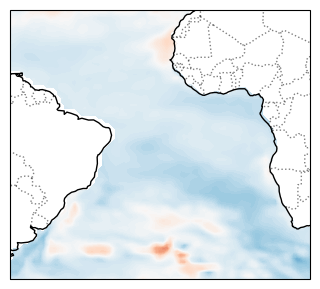

In [37]:
# PLOT EXAMPLE MAP FROM FIRST TIME IN DATA SERIES
Plot_SST_map(Atosa[0],Alat,Alon)

## DATA RESHAPE FOR SOM TRAIN

In [177]:
# mask nan values
mask=mask_2D(Atosa[0],100)
#compress data into a 2D vector
train_data=Compress_data_2D(Atosa[0:100],mask)
## NORMALIZE - may or maynot need
#train_data = train_data/np.max(train_data)

## SOM TRAIN

In [179]:
mapsize=[4,10] # time dimension is important to define the SOM mapsize
               # both must be of the same order if we want the SOM space
               # to represent well the data evolution in time.
som=Atlantic_FullSOM(train_data,x=mapsize[0],y=mapsize[1])
PATTERN = Patterns_SOM(train_data,som,Alat,Alon,mask)

 Training...
 pca_linear_initialization took: 0.043000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 12

 epoch: 1 ---> elapsed time:  0.033000, quantization error: 836.488496

 epoch: 2 ---> elapsed time:  0.019000, quantization error: 63.418414

 epoch: 3 ---> elapsed time:  0.017000, quantization error: 54.818492

 epoch: 4 ---> elapsed time:  0.020000, quantization error: 45.891549

 epoch: 5 ---> elapsed time:  0.023000, quantization error: 42.209712



Start Train


 epoch: 6 ---> elapsed time:  0.028000, quantization error: 39.009283

 epoch: 7 ---> elapsed time:  0.017000, quantization error: 35.655143

 epoch: 8 ---> elapsed time:  0.016000, quantization error: 32.653774

 epoch: 9 ---> elapsed time:  0.021000, quantization error: 29.737278

 epoch: 10 ---> elapsed time:  0.024000, quantization error: 26.792321

 epoch: 11 ---> elapsed time:  0.011000, quantization error: 23.950496

 epoch: 12 ---> elapsed time:  0.024000, quantization error: 21.191176

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 16

 epoch: 1 ---> elapsed time:  0.023000, quantization error: 18.622883

 epoch: 2 ---> elapsed time:  0.017000, quantization error: 18.179122

 epoch: 3 ---> elapsed time:  0.024000, quantization error: 17.324970

 epoch: 4 ---> elapsed time:  0.017000, quantization error: 17.195664

 epoch: 5 ---> elapsed time:  0.017000, quantization error: 17.187665

 epoch: 6 ---> elapsed time:  0.024000, quantization error: 1

Finish Train


## Plots

Ploting neuron Patterns: [########### VAI CORINTHIANS! ###########] 40/40
all done, the maps might take a while to appear


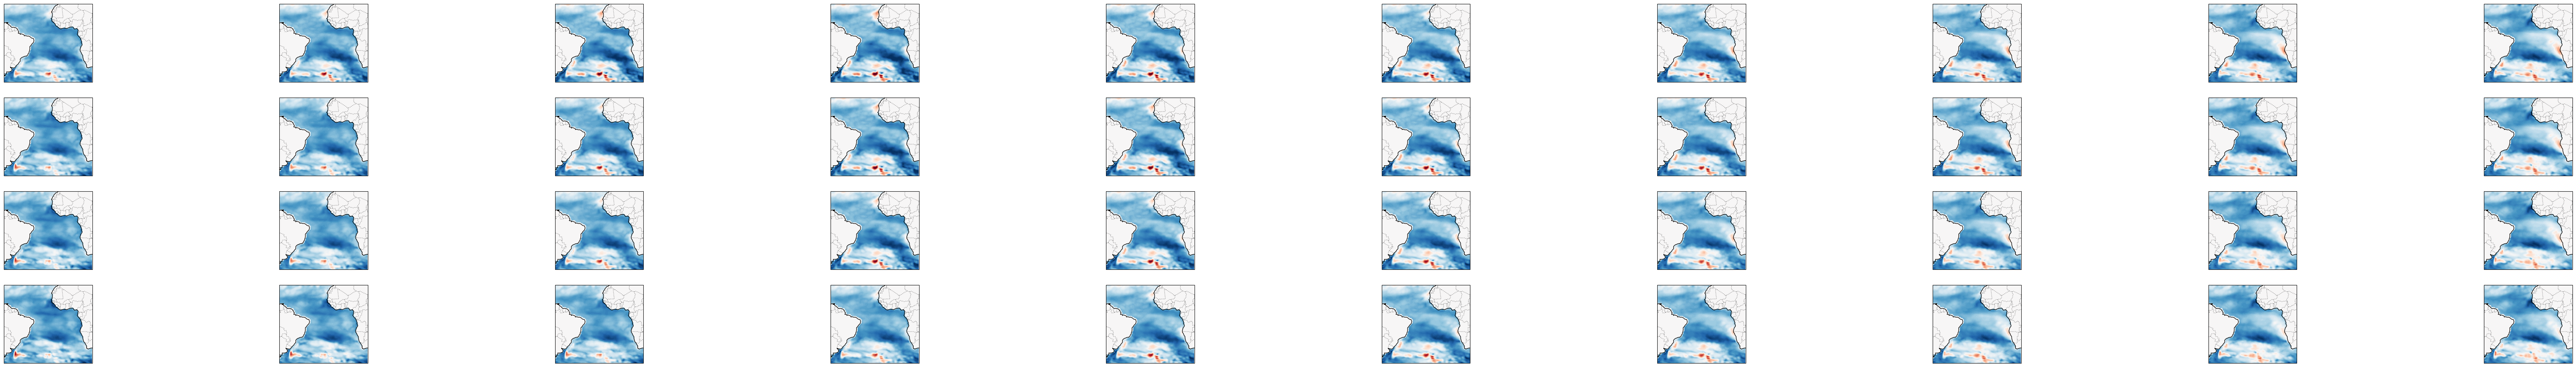

In [180]:
# Neuron grid
Plot_neurons(PATTERN,Alat,Alon,mapsize[0],mapsize[1])

In [181]:
# Computes the Correlation from the data series and the SOM neurons
Code, Prct, N_cluster = Correlacao(som,train_data) ## Porcentagem_sst = [malha SOM, tempo da série temporal]
# Finds the Best Matching Unit from the percentage matrix
bmu=BMU(Prct) 

Encontrando número de clusters
Buscando Clusters: [########### VAI CORINTHIANS! ###########] 18/18
Correlaçao: [########### VAI CORINTHIANS! ###########] 100/100
Time elapsed: 0'2"


In [183]:
# Clusterizes SOM into 10 clusters, just for ploting the example
cluster=som.cluster(n_clusters=10)

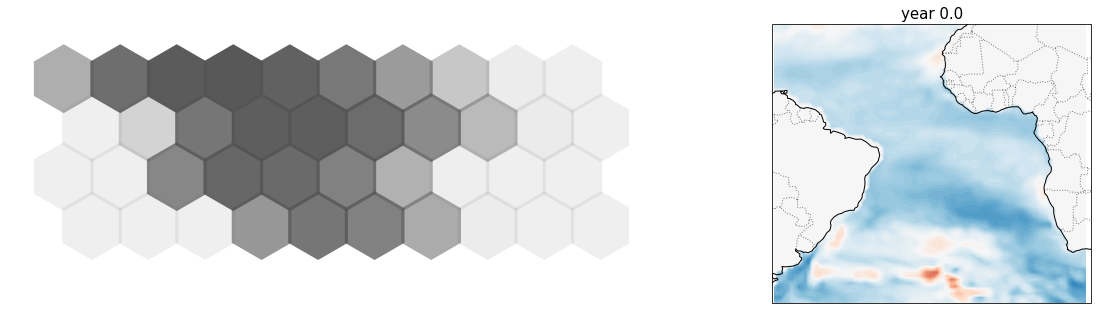

In [199]:
# Plots the mean positive correlated to data[time] neurons in SOM space. - a.k.a. the SOM projection
time=0
Imprime_evolucao_SST(som,cluster,Prct,PATTERN,Alat,Alon,time)

## Interactiver plot

In [200]:
import ipywidgets as widgets
TIME_slider = widgets.IntSlider(
    description='Month:',
    value=0,
    min=0, max=Prct.shape[1]-1, step=1,
    layout=widgets.Layout(width='50%'))

In [201]:
from ipywidgets import interact

interact(EvolPlot, t=TIME_slider)

interactive(children=(IntSlider(value=0, description='Month:', layout=Layout(width='50%'), max=99), Output()),…

<function __main__.EvolPlot(t)>